In [2]:
import pandas as pd
import numpy as np

from catboost import CatBoostRegressor
cat = CatBoostRegressor()

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('G:/내 드라이브/Github/BigContest_Flood-ZERO/고경수/train.csv')
test = pd.read_csv('G:/내 드라이브/Github/BigContest_Flood-ZERO/고경수/test.csv')
submission = pd.read_csv('G:/내 드라이브/Github/BigContest_Flood-ZERO/고경수/submission.csv')

In [4]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2,7,12,8,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [5]:
# train.corr()['유입량']

In [6]:
유역평균강수 = ['유역평균강수1','유역평균강수2','유역평균강수3','유역평균강수4','유역평균강수5','유역평균강수6']
강우A = ['강우A1','강우A2','강우A3','강우A4','강우A5','강우A6']
강우B = ['강우B1','강우B2','강우B3','강우B4','강우B5','강우B6']
강우C = ['강우C1','강우C2','강우C3','강우C4','강우C5','강우C6']
강우D = ['강우D1','강우D2','강우D3','강우D4','강우D5','강우D6']
수위E = ['수위E1','수위E2','수위E3','수위E4','수위E5','수위E6']
수위D = ['수위D1','수위D2','수위D3','수위D4','수위D5','수위D6']

In [7]:
# print(train[유역평균강수].mean())

In [8]:
# print(train[강우A].mean())

In [9]:
# print(train[강우B].mean())

In [10]:
# print(train[강우C].mean())

In [11]:
# print(train[강우D].mean())

In [12]:
# print(train[수위E].mean())

In [13]:
# print(train[수위D].mean())

In [14]:
# drops = [*유역평균강수,*강우A,*강우B,*강우C,*강우D,*수위E,*수위D]

# train = train.drop(drops, axis=1)

In [15]:
# train.head()

In [16]:
# train.columns

In [17]:
# x_train = train[['유역평균강수', '강우A', '강우B', '강우C','강우D', '수위E', '수위D']]
# y_train = train['유입량']

# x_test = test[['유역평균강수', '강우A', '강우B', '강우C','강우D', '수위E', '수위D']]

# X = train[['시간','월','유역평균강수', '강우A', '강우B', '강우C','강우D', '수위E', '수위D']]

X = train[['월',*유역평균강수, *강우A, *강우B, *강우C,*강우D, *수위E, *수위D]]

y = train['유입량']

In [18]:
train

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7,7,7,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7,8,7,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7,9,7,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7,10,7,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7,12,8,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25.0,2017.0,7.0,18.0,18.0,513.368437,22.7836,6,0,1,...,1,3.03,137.088,1.7366,6,0,1,1,3.03,137.130
2887,25.0,2017.0,7.0,18.0,19.0,502.846843,8.2586,2,0,1,...,1,3.00,137.104,1.7366,2,0,1,1,3.00,137.145
2888,25.0,2017.0,7.0,18.0,20.0,491.954805,4.1089,1,0,1,...,1,2.98,137.120,1.7366,1,0,1,1,2.98,137.155
2889,25.0,2017.0,7.0,18.0,21.0,481.103083,3.3854,1,0,1,...,1,2.96,137.136,1.7366,1,0,1,1,2.96,137.165


<AxesSubplot:ylabel='연'>

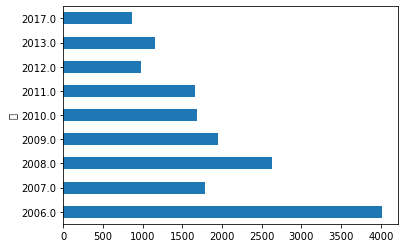

In [30]:
train.groupby('연').mean()['유입량'].plot(kind='barh')

<AxesSubplot:ylabel='시간'>

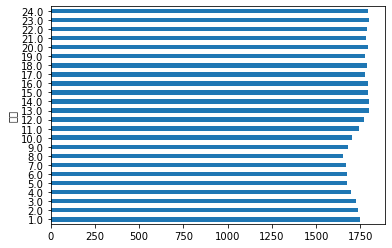

In [34]:
train.groupby('시간').mean()['유입량'].plot(kind='barh')

<AxesSubplot:ylabel='시간'>

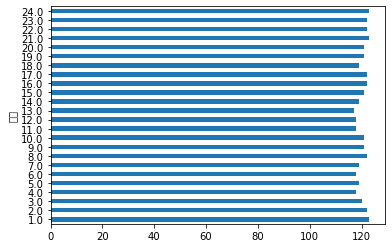

In [33]:
train.groupby('시간').count()['유입량'].plot(kind='barh')